<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/TP2_INICIAL_MAJO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y Tecnología - TP N° 2**

# Análisis de redes y grafos

In [1]:
!pip install networkx powerlaw community

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=5241c4600b7b09136d71a67763681d54ac4cbb364db93fdbe467b985edb96553
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [2]:
# Para visuzalización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx
import community
import powerlaw

from sklearn.metrics import adjusted_rand_score
import glob

In [3]:
# Descomprimo el ZIP
!unzip DataSujetos.zip

Archive:  DataSujetos.zip
   creating: DataSujetos/
  inflating: DataSujetos/N1_suj1.csv  
  inflating: DataSujetos/N1_suj10.csv  
  inflating: DataSujetos/N1_suj11.csv  
  inflating: DataSujetos/N1_suj12.csv  
  inflating: DataSujetos/N1_suj13.csv  
  inflating: DataSujetos/N1_suj14.csv  
  inflating: DataSujetos/N1_suj15.csv  
  inflating: DataSujetos/N1_suj16.csv  
  inflating: DataSujetos/N1_suj17.csv  
  inflating: DataSujetos/N1_suj18.csv  
  inflating: DataSujetos/N1_suj2.csv  
  inflating: DataSujetos/N1_suj3.csv  
  inflating: DataSujetos/N1_suj4.csv  
  inflating: DataSujetos/N1_suj5.csv  
  inflating: DataSujetos/N1_suj6.csv  
  inflating: DataSujetos/N1_suj7.csv  
  inflating: DataSujetos/N1_suj8.csv  
  inflating: DataSujetos/N1_suj9.csv  
  inflating: DataSujetos/N2_suj1.csv  
  inflating: DataSujetos/N2_suj10.csv  
  inflating: DataSujetos/N2_suj11.csv  
  inflating: DataSujetos/N2_suj12.csv  
  inflating: DataSujetos/N2_suj13.csv  
  inflating: DataSujetos/N2_suj14.csv 

In [6]:
# genero 4 vectores con los nombres de los archivos por estadio
N1_csv = glob.glob('DataSujetos/N1_*.csv')
N2_csv = glob.glob('DataSujetos/N2_*.csv')
N3_csv = glob.glob('DataSujetos/N3_*.csv')
W_csv = glob.glob('DataSujetos/W_*.csv')

In [38]:
def calcula_umbral_posicion(matriz, num):

  matriz2= np.copy(matriz)
  vec_matriz= matriz2.flatten()
  vec_matriz= np.sort(vec_matriz)

  umbral= vec_matriz[num]

  matriz2[matriz2<=umbral] = 0
  matriz2[matriz2>umbral] = 1

  return matriz2
  
def calcula_umbral_porcentaje(matriz, porc):

  matriz2= np.copy(matriz)
  vec_matriz= matriz2.flatten()
  vec_matriz= np.sort(vec_matriz)


  umbral= (max(vec_matriz) - min(vec_matriz))*(1- porc) + min(vec_matriz)

  matriz2[matriz2<=umbral] = 0
  matriz2[matriz2>umbral] = 1

  return matriz2

## Datos de entrada
Contamos con informacion de 18 personas.
Tenemos 1 matriz pesada por persona para 3 estadíos de sueño (N1, N2 y N3) y 1 para despierto (W)

In [10]:
# levantamos la primera matriz para el sujeto 1 para ver su forma
ws = pd.read_csv('/content/DataSujetos/N1_suj11.csv',sep=',',header=None)
# la matriz es de 116X116 correspondientes a las 116 regiones del cerebro descriptas en el archivo(aal_extended.csv)
# se trata de una matriz pesada

ws.shape

(116, 116)

In [11]:
ws

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.00000,0.891530,0.776680,0.72642,0.691560,0.557780,0.787210,0.75190,0.62461,0.600510,0.758640,0.58770,0.69085,0.61363,0.59454,0.43792,0.79327,0.78283,0.851700,0.857930,0.049283,-0.005009,0.60011,0.62508,0.64215,0.43468,0.621370,0.514360,0.65285,0.57275,0.45323,0.38039,0.839080,0.770710,0.66646,0.61438,0.42305,0.30589,0.544440,0.54069,...,0.081598,0.091802,0.66121,0.62879,0.80801,0.792150,0.58680,0.72913,0.654910,0.673590,0.38295,0.469210,0.593120,0.63819,0.605040,0.757710,0.336700,0.687080,0.49332,0.27232,0.69685,0.53809,0.75944,0.757930,0.53242,0.640290,0.57478,0.65079,0.21311,0.46405,0.50506,0.57855,0.048293,0.54685,0.629570,0.70536,0.559570,0.52622,0.35157,-0.016270
1,0.89153,1.000000,0.761580,0.73029,0.689980,0.565520,0.742470,0.71559,0.58044,0.619370,0.670650,0.55848,0.61704,0.59624,0.53767,0.47038,0.79490,0.81189,0.841450,0.861760,0.088638,0.022778,0.59220,0.62983,0.62336,0.42794,0.592310,0.542740,0.60632,0.57948,0.39034,0.34482,0.817520,0.745820,0.64771,0.62164,0.50267,0.39529,0.610780,0.61943,...,0.073771,0.094202,0.63958,0.64408,0.79931,0.799220,0.55570,0.74219,0.645770,0.690660,0.40202,0.507910,0.620740,0.68552,0.666810,0.786700,0.429770,0.726260,0.48031,0.28424,0.75553,0.57901,0.81083,0.791250,0.61333,0.643020,0.61974,0.67941,0.23936,0.46199,0.53840,0.60143,0.113560,0.57036,0.701920,0.76850,0.630100,0.59393,0.39011,0.007101
2,0.77668,0.761580,1.000000,0.83615,0.763660,0.599770,0.900710,0.76776,0.79777,0.771290,0.603630,0.53528,0.79910,0.70966,0.74207,0.64084,0.62015,0.63067,0.774070,0.696810,0.027686,-0.094734,0.85685,0.83314,0.74500,0.48521,0.684590,0.643830,0.53875,0.54034,0.39617,0.35635,0.678620,0.597030,0.68512,0.53686,0.56485,0.41477,0.624490,0.62056,...,-0.017790,-0.030235,0.60642,0.57304,0.82529,0.813440,0.68811,0.73656,0.821950,0.832270,0.59975,0.653390,0.777240,0.80705,0.615750,0.794370,0.433170,0.770360,0.44108,0.29454,0.67899,0.58281,0.70405,0.753880,0.53350,0.610010,0.54579,0.61843,0.20132,0.47574,0.47554,0.54532,0.139240,0.50284,0.653030,0.65506,0.534380,0.47892,0.34978,0.066998
3,0.72642,0.730290,0.836150,1.00000,0.613560,0.504450,0.815790,0.88826,0.71512,0.727010,0.580970,0.57666,0.68499,0.71877,0.58709,0.62598,0.62088,0.62422,0.751970,0.737680,-0.072252,-0.132660,0.76560,0.87569,0.71969,0.62804,0.552430,0.490710,0.56736,0.55476,0.54582,0.53933,0.723670,0.698830,0.69746,0.65220,0.39724,0.28158,0.408170,0.43489,...,0.187360,0.216090,0.58524,0.59270,0.69407,0.689430,0.50803,0.60564,0.617440,0.700620,0.34073,0.407110,0.569620,0.65620,0.653880,0.734960,0.567880,0.730480,0.43009,0.28436,0.56342,0.41729,0.62928,0.656180,0.62126,0.611650,0.56361,0.58994,0.21433,0.42113,0.46725,0.53017,0.177580,0.49741,0.539260,0.52921,0.533080,0.45274,0.35326,0.114770
4,0.69156,0.689980,0.763660,0.61356,1.000000,0.682850,0.801010,0.65955,0.79264,0.661210,0.611070,0.48609,0.68280,0.56544,0.62016,0.49182,0.57900,0.61581,0.685440,0.659620,0.122750,0.003369,0.55212,0.56237,0.57634,0.28549,0.652120,0.594080,0.46345,0.46416,0.25815,0.19323,0.628990,0.574320,0.63462,0.47899,0.41568,0.30361,0.541460,0.49185,...,-0.040085,-0.051863,0.53795,0.51180,0.71795,0.692790,0.60196,0.70918,0.678630,0.638860,0.43666,0.542500,0.723920,0.68878,0.578250,0.717760,0.325200,0.661420,0.35159,0.19702,0.60404,0.47450,0.64621,0.668450,0.45449,0.589430,0.50218,0.58143,0.09932,0.39385,0.43694,0.51150,0.094592,0.48851,0.600770,0.63290,0.538160,0.43839,0.27954,-0.044631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.70536,0.76

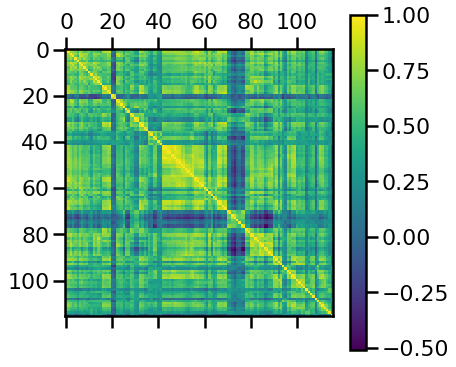

In [12]:
plt.matshow(ws)
plt.colorbar()


In [13]:
 #lo transformo a array de nump para luego transformarlo en matriz de NX
ws_a = np.array(ws)
G_obs = nx.from_numpy_matrix(ws_a)# usar opción parallel_edges=False si se usa una matriz de ints

In [ ]:
ws_a

array([[ 1.     ,  0.8582 ,  0.7482 , ...,  0.37435,  0.19217, -0.40383],
       [ 0.8582 ,  1.     ,  0.66561, ...,  0.44131,  0.21853, -0.46819],
       [ 0.7482 ,  0.66561,  1.     , ...,  0.29699,  0.18883, -0.29562],
       ...,
       [ 0.37435,  0.44131,  0.29699, ...,  1.     ,  0.7395 , -0.1367 ],
       [ 0.19217,  0.21853,  0.18883, ...,  0.7395 ,  1.     , -0.01452],
       [-0.40383, -0.46819, -0.29562, ..., -0.1367 , -0.01452,  1.     ]])

In [ ]:
# vemos el contenido de uno de los vectores
N1_csv[1:10]

['DataSujetos/N1_suj12.csv',
 'DataSujetos/N1_suj15.csv',
 'DataSujetos/N1_suj14.csv',
 'DataSujetos/N1_suj9.csv',
 'DataSujetos/N1_suj4.csv',
 'DataSujetos/N1_suj18.csv',
 'DataSujetos/N1_suj3.csv',
 'DataSujetos/N1_suj2.csv',
 'DataSujetos/N1_suj1.csv']

In [14]:
# voy a generar una matriz con los promedios
# para el primero de los vectores
N1_prom = np.zeros((116, 116))

for arch in N1_csv:
    # levanto los datos, los trasnformo a array 
    mat=pd.read_csv(arch,sep=',',header=None)
    mat=np.array(mat)
    # los voy sumando todos a mi matriz N1_prom
    N1_prom=N1_prom+mat
   
# divido por el total para generar el promedio
N1_prom = N1_prom/len(N1_csv)
pd.DataFrame(N1_prom)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.904321,0.735057,0.723526,0.583049,0.561781,0.758981,0.735127,0.616454,0.575069,0.798199,0.741889,0.796870,0.729703,0.725438,0.688164,0.799044,0.764322,0.849991,0.815863,0.462332,0.365780,0.641368,0.620678,0.554219,0.546984,0.595826,0.614568,0.704503,0.662316,0.514237,0.471428,0.749762,0.684322,0.588193,0.505072,0.584542,0.533939,0.584192,0.617726,...,0.284393,0.243344,0.745783,0.725301,0.830978,0.824026,0.711716,0.730188,0.766596,0.751021,0.629226,0.643766,0.743592,0.753803,0.418929,0.488288,0.269370,0.433745,0.493879,0.430857,0.644284,0.599597,0.567273,0.607399,0.410305,0.502729,0.433733,0.472363,0.390682,0.447964,0.326236,0.275041,0.333900,0.535109,0.488681,0.483971,0.401715,0.479057,0.349738,0.158671
1,0.904321,1.000000,0.696327,0.736999,0.571637,0.549751,0.709039,0.733717,0.578979,0.558938,0.723089,0.752709,0.717012,0.713167,0.664749,0.673847,0.811242,0.825954,0.827089,0.853472,0.459610,0.367985,0.617328,0.612208,0.528532,0.545016,0.578540,0.593918,0.703590,0.701004,0.539663,0.507807,0.775787,0.733652,0.585885,0.522805,0.587843,0.565382,0.594246,0.638775,...,0.329038,0.312032,0.762412,0.766811,0.825954,0.838771,0.674980,0.725057,0.713167,0.725436,0.585156,0.609877,0.693244,0.723254,0.437581,0.471662,0.287685,0.422231,0.490846,0.456862,0.672863,0.609024,0.593846,0.604942,0.434351,0.484626,0.462586,0.468298,0.392686,0.438036,0.346351,0.282312,0.340845,0.536268,0.526147,0.510107,0.423120,0.511886,0.356228,0.151768
2,0.735057,0.696327,1.000000,0.863467,0.787321,0.720569,0.903822,0.763985,0.809697,0.698096,0.626762,0.609227,0.716488,0.650970,0.719406,0.664832,0.590357,0.594939,0.737369,0.666944,0.517589,0.419107,0.904726,0.849873,0.758462,0.737178,0.729962,0.701077,0.540223,0.533262,0.610132,0.599482,0.692215,0.624655,0.628975,0.530712,0.537168,0.500675,0.558182,0.586266,...,0.295499,0.263574,0.571846,0.571488,0.643250,0.666548,0.595309,0.629561,0.726386,0.708465,0.577475,0.619362,0.710089,0.739602,0.543347,0.585519,0.485778,0.621566,0.385777,0.298580,0.538484,0.479816,0.517110,0.556484,0.444853,0.558681,0.429604,0.458138,0.397008,0.442425,0.321995,0.243823,0.243093,0.397221,0.440448,0.444766,0.441407,0.422304,0.322304,0.050469
3,0.723526,0.736999,0.863467,1.000000,0.723804,0.743645,0.842917,0.892964,0.744762,0.743132,0.625271,0.696274,0.687060,0.733075,0.668633,0.715651,0.614962,0.629722,0.734532,0.717461,0.515362,0.458428,0.831008,0.872948,0.685676,0.742821,0.675180,0.694593,0.579985,0.599917,0.659532,0.686303,0.727107,0.707533,0.634327,0.583401,0.534052,0.531735,0.548344,0.589084,...,0.333826,0.338650,0.590976,0.597723,0.650580,0.679424,0.577462,0.638287,0.694320,0.714596,0.527138,0.568614,0.681863,0.727273,0.588289,0.545304,0.533672,0.551064,0.396819,0.326679,0.542108,0.471251,0.540630,0.538046,0.523107,0.527224,0.477276,0.442825,0.428241,0.431057,0.355737,0.263165,0.274479,0.423171,0.464159,0.447382,0.425683,0.423810,0.339419,0.090560
4,0.583049,0.571637,0.787321,0.723804,1.000000,0.792615,0.743912,0.648637,0.819362,0.711658,0.476791,0.480378,0.567964,0.527561,0.648246,0.587152,0.476584,0.485861,0.577368,0.553583,0.515914,0.425365,0.729651,0.703407,0.666939,0.610453,0.723078,0.660629,0.424320,0.436544,0.479758,0.472224,0.580057,0.531737,0.532924,0.465096,0.431838,0.421634,0.471289,0.483160,...,0.225997,0.200061,0.468703,0.462036,0.529566,0.544688,0.508353,0.547812,0.587046,0.583724,0.519539,0.534733,0.627295,0.644307,0.500955,0.522314,0.457026,0.548534,0.306271,0.214374,0.433992,0.354488,0.440587,0.469278,0.398539,0.511852,0.382927,0.418770,0.322322,0.367448,0.292212,0.214037,0.199547,0.316876,0.391484,0.391257,0.411443,0.377174,0.280599,0.022240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [15]:
# voy a generar una matriz con los promedios
# para el primero de los vectores

N2_prom = np.zeros((116, 116))

for arch in N2_csv:
    # levanto los datos, los trasnformo a array 
    mat=pd.read_csv(arch,sep=',',header=None)
    mat=np.array(mat)
    # los voy sumando todos a mi matriz N2_prom
    N2_prom=N2_prom+mat
   
# divido por el total para generar el promedio
N2_prom = N2_prom/len(N2_csv)
pd.DataFrame(N2_prom)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.837192,0.723992,0.714543,0.607531,0.588598,0.726177,0.733429,0.566370,0.571422,0.732387,0.690289,0.689967,0.658501,0.642363,0.603589,0.708004,0.679699,0.844637,0.811516,0.425428,0.385908,0.630849,0.580822,0.502332,0.495559,0.521666,0.526271,0.609496,0.577906,0.564755,0.550062,0.775318,0.754578,0.608618,0.566458,0.476872,0.450898,0.443878,0.492301,...,0.417335,0.414528,0.615594,0.615561,0.652863,0.639094,0.574348,0.586219,0.550783,0.507296,0.481553,0.458899,0.596389,0.579279,0.355669,0.386954,0.298197,0.373208,0.294684,0.248546,0.392774,0.348792,0.331354,0.376901,0.387750,0.376187,0.344158,0.305660,0.230335,0.286099,0.267853,0.148644,0.168361,0.337270,0.356179,0.379774,0.268125,0.351038,0.264919,0.020578
1,0.837192,1.000000,0.620606,0.671886,0.549683,0.528186,0.604064,0.655014,0.502421,0.502028,0.585194,0.616922,0.567233,0.572463,0.575456,0.554584,0.709144,0.758531,0.794182,0.863688,0.436407,0.391346,0.558281,0.509093,0.457758,0.466158,0.470409,0.465646,0.597976,0.614108,0.565711,0.541242,0.771714,0.773722,0.567582,0.552203,0.447927,0.446989,0.430791,0.500552,...,0.453691,0.465196,0.623697,0.676846,0.617689,0.626891,0.526423,0.570593,0.418980,0.428135,0.416064,0.405070,0.483383,0.485687,0.319995,0.338172,0.264994,0.328696,0.345050,0.311095,0.498292,0.379684,0.387043,0.367012,0.374449,0.328644,0.374776,0.278639,0.255776,0.277678,0.297457,0.165335,0.202535,0.364401,0.410777,0.425941,0.281234,0.398590,0.295995,0.005839
2,0.723992,0.620606,1.000000,0.865224,0.775811,0.721733,0.882504,0.781109,0.762259,0.700440,0.606006,0.570737,0.678346,0.619231,0.691309,0.631398,0.539323,0.528452,0.713862,0.648915,0.465021,0.407303,0.860509,0.804026,0.705701,0.679323,0.656308,0.651135,0.476444,0.459007,0.626023,0.609181,0.692942,0.648794,0.660261,0.599594,0.464816,0.445066,0.484497,0.516019,...,0.369864,0.361612,0.503263,0.495833,0.577571,0.587822,0.545939,0.547784,0.603254,0.562625,0.483963,0.498302,0.624359,0.625182,0.497484,0.506749,0.496167,0.544111,0.282568,0.236818,0.364589,0.315889,0.358164,0.387710,0.459897,0.462081,0.385405,0.348450,0.312342,0.373895,0.294999,0.154902,0.187770,0.297731,0.338849,0.351147,0.326451,0.347906,0.271008,0.014969
3,0.714543,0.671886,0.865224,1.000000,0.719022,0.730379,0.818658,0.871837,0.702252,0.737197,0.578214,0.640002,0.633115,0.684657,0.648976,0.676307,0.537080,0.544650,0.693844,0.679313,0.474111,0.427846,0.805272,0.833144,0.668576,0.696108,0.634564,0.664606,0.486457,0.506456,0.637786,0.657433,0.700537,0.688388,0.669949,0.643913,0.462891,0.467851,0.475541,0.529293,...,0.376702,0.380776,0.487132,0.487519,0.562621,0.590128,0.532512,0.564443,0.577009,0.601823,0.461751,0.503432,0.595389,0.637208,0.513721,0.469106,0.513955,0.500281,0.274013,0.236930,0.372722,0.305115,0.352899,0.365426,0.492484,0.435843,0.399882,0.325737,0.314871,0.354051,0.309283,0.166202,0.177324,0.291108,0.344164,0.343744,0.305265,0.310409,0.250319,0.012041
4,0.607531,0.549683,0.775811,0.719022,1.000000,0.811258,0.769678,0.707867,0.807494,0.734758,0.522022,0.500014,0.580579,0.525931,0.620728,0.557804,0.419829,0.431467,0.569198,0.541303,0.417360,0.348722,0.653743,0.622694,0.580284,0.527983,0.672925,0.618507,0.386020,0.380017,0.446657,0.429793,0.589729,0.551234,0.557390,0.535021,0.401331,0.410482,0.402334,0.451421,...,0.320594,0.324644,0.372751,0.383765,0.418712,0.431854,0.443941,0.456957,0.438850,0.417544,0.413126,0.397377,0.593134,0.607327,0.466716,0.454520,0.463292,0.483584,0.236683,0.184622,0.319346,0.248111,0.308767,0.334706,0.430465,0.429076,0.353918,0.308873,0.234651,0.286534,0.293971,0.156409,0.143407,0.255484,0.305470,0.324212,0.332988,0.315696,0.242698,0.007711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [16]:
N3_prom = np.zeros((116, 116))

for arch in N3_csv:
    # levanto los datos, los trasnformo a array 
    mat=pd.read_csv(arch,sep=',',header=None)
    mat=np.array(mat)
    # los voy sumando todos a mi matriz N3_prom
    N3_prom=N3_prom+mat
   
# divido por el total para generar el promedio
N3_prom = N3_prom/len(N3_csv)
pd.DataFrame(N3_prom)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.737851,0.653673,0.644296,0.483064,0.464168,0.634966,0.651670,0.469241,0.467528,0.626024,0.600714,0.566279,0.552739,0.531977,0.512814,0.628221,0.584634,0.749555,0.696773,0.323268,0.228194,0.522397,0.452886,0.358050,0.318925,0.418684,0.399357,0.507568,0.519149,0.377685,0.368011,0.661010,0.632169,0.432037,0.433077,0.438715,0.402792,0.376405,0.399302,...,0.363798,0.374189,0.473681,0.491294,0.506776,0.481544,0.477188,0.477973,0.492521,0.409746,0.390233,0.377253,0.537746,0.538351,0.352978,0.394711,0.322004,0.412561,0.234984,0.199812,0.318174,0.331284,0.355795,0.387477,0.392031,0.426381,0.382593,0.340677,0.279491,0.320906,0.312538,0.202502,0.151257,0.282169,0.346802,0.359514,0.332326,0.341220,0.281909,0.066415
1,0.737851,1.000000,0.527559,0.583881,0.406094,0.375040,0.462486,0.547149,0.352618,0.356246,0.423711,0.519911,0.387324,0.448676,0.414805,0.423230,0.621902,0.661832,0.673266,0.775728,0.320205,0.245157,0.423070,0.359626,0.285416,0.283357,0.323109,0.328461,0.476344,0.544091,0.367566,0.345848,0.651968,0.659138,0.381523,0.404277,0.428426,0.419999,0.364249,0.423334,...,0.407415,0.440021,0.481063,0.532243,0.465337,0.455839,0.404342,0.442373,0.345270,0.325378,0.338816,0.334108,0.390159,0.424104,0.315800,0.337500,0.291799,0.359036,0.303740,0.282080,0.476182,0.394359,0.446118,0.400825,0.393580,0.364981,0.433611,0.321950,0.290534,0.309079,0.351084,0.236327,0.192293,0.342414,0.450717,0.435734,0.345911,0.424224,0.349560,0.044365
2,0.653673,0.527559,1.000000,0.801210,0.660622,0.576585,0.856908,0.730563,0.681230,0.589208,0.558284,0.561878,0.642017,0.608984,0.647695,0.633541,0.531237,0.495219,0.678756,0.547348,0.441207,0.352763,0.825766,0.729434,0.592766,0.513071,0.573799,0.554625,0.475552,0.489673,0.536168,0.531612,0.621832,0.571954,0.527774,0.507538,0.440797,0.426602,0.446607,0.481825,...,0.287350,0.303532,0.436371,0.409324,0.506363,0.515289,0.523528,0.531932,0.597757,0.521149,0.427320,0.433623,0.634438,0.619741,0.491410,0.540988,0.505231,0.570658,0.235215,0.264562,0.315689,0.336437,0.353754,0.409229,0.447728,0.522893,0.387264,0.370988,0.320131,0.375490,0.277592,0.194567,0.188536,0.262854,0.359715,0.368518,0.355861,0.345996,0.244370,0.072681
3,0.644296,0.583881,0.801210,1.000000,0.594273,0.588109,0.760903,0.846131,0.595492,0.615807,0.527345,0.603194,0.578750,0.654116,0.569962,0.611193,0.481833,0.466248,0.635661,0.606159,0.401015,0.315025,0.719914,0.759388,0.525434,0.540870,0.541916,0.562856,0.485324,0.519751,0.549429,0.548059,0.648875,0.640230,0.527158,0.543438,0.453183,0.460528,0.420633,0.467307,...,0.344531,0.367996,0.373543,0.363320,0.444363,0.465388,0.468289,0.501700,0.533079,0.530112,0.372820,0.398046,0.590385,0.603291,0.503523,0.489623,0.546626,0.540574,0.247022,0.244499,0.358900,0.314928,0.372297,0.376091,0.505116,0.503085,0.431013,0.360167,0.332177,0.360799,0.340146,0.230747,0.208705,0.289897,0.373024,0.368934,0.396406,0.321025,0.274813,0.070433
4,0.483064,0.406094,0.660622,0.594273,1.000000,0.732792,0.682942,0.599549,0.788687,0.686463,0.476777,0.458969,0.561053,0.483434,0.635108,0.544008,0.407882,0.418996,0.458352,0.384170,0.396218,0.265946,0.549229,0.538595,0.538825,0.422767,0.650745,0.562268,0.403285,0.354653,0.267852,0.277746,0.475839,0.410869,0.470467,0.485753,0.325812,0.316682,0.311397,0.361335,...,0.196511,0.193097,0.310364,0.306426,0.358136,0.381841,0.433852,0.428402,0.400698,0.381784,0.374189,0.374541,0.582424,0.590107,0.429154,0.434833,0.471638,0.502946,0.194922,0.139166,0.255118,0.212620,0.231774,0.321802,0.326475,0.421250,0.252836,0.221455,0.177667,0.216946,0.234388,0.116240,0.106006,0.178971,0.291002,0.312828,0.315815,0.294717,0.161984,-0.006851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [17]:
W_prom = np.zeros((116, 116))

for arch in W_csv:
    # levanto los datos, los trasnformo a array 
    mat=pd.read_csv(arch,sep=',',header=None)
    mat=np.array(mat)
    # los voy sumando todos a mi matriz W_prom
    W_prom=W_prom+mat
   
# divido por el total para generar el promedio
W_prom = W_prom/len(W_csv)
pd.DataFrame(W_prom)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.875693,0.640179,0.620273,0.537648,0.519712,0.690205,0.676957,0.527809,0.520827,0.776002,0.730149,0.757972,0.717784,0.648342,0.634849,0.746908,0.731713,0.795811,0.809248,0.437974,0.363453,0.539710,0.490761,0.421558,0.397275,0.463364,0.438215,0.678466,0.655556,0.452249,0.408462,0.720349,0.684654,0.526097,0.481108,0.562813,0.541464,0.476161,0.519556,...,0.488177,0.469378,0.675001,0.687168,0.761291,0.771008,0.658663,0.676078,0.729785,0.706627,0.534043,0.522509,0.702244,0.686351,0.465417,0.526524,0.346619,0.473633,0.480182,0.380956,0.613737,0.573434,0.583796,0.630896,0.463907,0.505477,0.458625,0.486726,0.367109,0.410583,0.339597,0.309208,0.301516,0.484094,0.527805,0.512767,0.438433,0.481611,0.413802,0.188360
1,0.875693,1.000000,0.585738,0.614653,0.510480,0.498704,0.611273,0.656663,0.472469,0.486394,0.686973,0.711227,0.676981,0.685143,0.613177,0.616338,0.764991,0.782433,0.756734,0.818902,0.418277,0.368557,0.511892,0.473247,0.423812,0.397516,0.443608,0.434235,0.670869,0.661997,0.440701,0.404269,0.715614,0.691734,0.504487,0.457110,0.539734,0.545866,0.463713,0.532268,...,0.439900,0.437768,0.678039,0.722325,0.775078,0.799749,0.632201,0.680373,0.684449,0.698657,0.524345,0.528674,0.625148,0.651254,0.456061,0.483181,0.308536,0.407825,0.467284,0.400853,0.613965,0.567959,0.593913,0.615321,0.429223,0.435937,0.441119,0.432825,0.345485,0.360012,0.343168,0.277429,0.297501,0.458859,0.508864,0.495661,0.400285,0.468672,0.374851,0.200169
2,0.640179,0.585738,1.000000,0.844262,0.725156,0.665421,0.882303,0.741961,0.703934,0.632967,0.549746,0.555347,0.643945,0.599143,0.647688,0.624784,0.461723,0.459769,0.703662,0.626335,0.502374,0.436778,0.867058,0.807084,0.670323,0.673805,0.589305,0.569615,0.495934,0.449218,0.634698,0.629193,0.649284,0.627258,0.585924,0.534788,0.494741,0.488059,0.464418,0.497656,...,0.437262,0.438330,0.443384,0.441341,0.477153,0.513442,0.530011,0.516164,0.608386,0.599646,0.474696,0.458882,0.604523,0.621803,0.607087,0.628763,0.567826,0.683548,0.371192,0.279851,0.457194,0.442478,0.475575,0.516961,0.507811,0.618687,0.466848,0.512347,0.464581,0.496270,0.312373,0.302109,0.224536,0.370564,0.464608,0.443559,0.447182,0.440531,0.399424,0.225343
3,0.620273,0.614653,0.844262,1.000000,0.667408,0.716342,0.815525,0.872932,0.647669,0.697648,0.544857,0.628798,0.595098,0.671812,0.593926,0.678960,0.472987,0.467601,0.682877,0.665859,0.445009,0.413617,0.791692,0.848471,0.583378,0.655566,0.543513,0.560035,0.510246,0.496887,0.630669,0.690351,0.653239,0.684888,0.568730,0.559150,0.474686,0.511156,0.430553,0.483003,...,0.429935,0.470051,0.445494,0.443501,0.478836,0.517637,0.508324,0.513581,0.565121,0.627245,0.432044,0.424881,0.564754,0.634548,0.662098,0.580137,0.605562,0.585964,0.359272,0.292383,0.435741,0.409954,0.494836,0.491924,0.547161,0.540076,0.475287,0.466979,0.461178,0.450094,0.312909,0.302212,0.215305,0.340608,0.439723,0.422491,0.408170,0.414304,0.389722,0.215749
4,0.537648,0.510480,0.725156,0.667408,1.000000,0.769444,0.720525,0.637168,0.800874,0.720201,0.488337,0.531548,0.576443,0.545363,0.612533,0.605938,0.401999,0.419554,0.517237,0.501873,0.470901,0.396657,0.644413,0.619377,0.562928,0.537004,0.610578,0.550356,0.433548,0.417774,0.431386,0.456080,0.529965,0.500697,0.455092,0.450422,0.407664,0.401935,0.404734,0.443307,...,0.308858,0.325351,0.376857,0.380123,0.434164,0.471490,0.479436,0.487439,0.532010,0.539198,0.462173,0.450648,0.595996,0.628790,0.540232,0.544767,0.517194,0.594668,0.293059,0.189614,0.387272,0.354985,0.404068,0.463481,0.471212,0.545033,0.441244,0.445596,0.376715,0.400882,0.259528,0.263289,0.163236,0.269284,0.406316,0.388903,0.399041,0.381786,0.299067,0.138788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

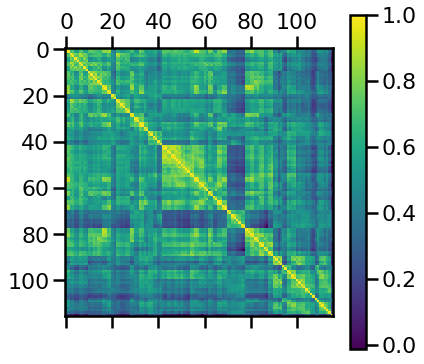

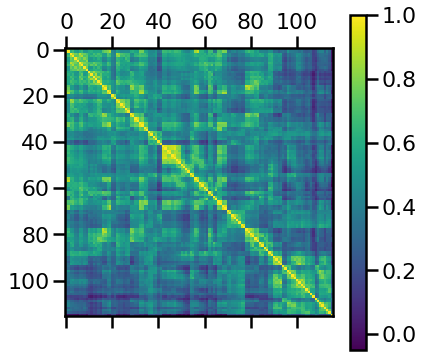

In [22]:
plt.matshow(N1_prom)
plt.colorbar()

plt.matshow(N2_prom)
plt.colorbar()


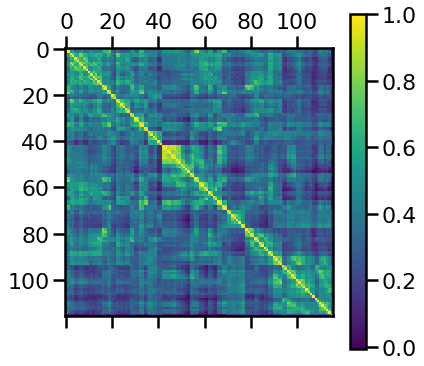

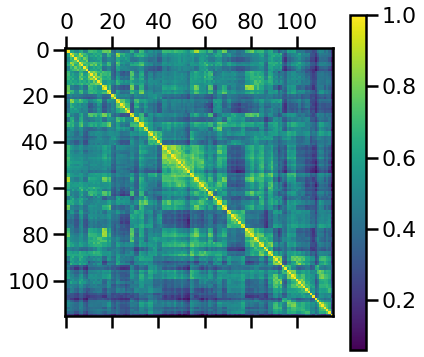

In [23]:
plt.matshow(N3_prom)
plt.colorbar()

plt.matshow(W_prom)
plt.colorbar()

In [29]:
print(N1_prom.min())
print(N2_prom.min())
print(N3_prom.min())
W_prom.min()

-0.014196222222222225
-0.04891337222222222
-0.006851244444444448


0.060809838888888884

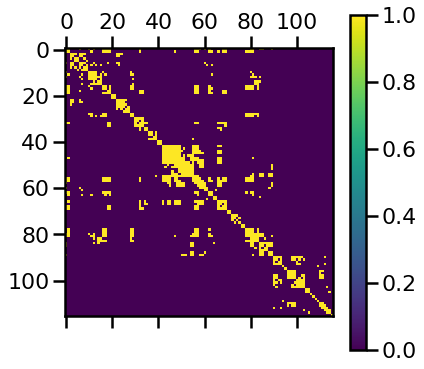

In [100]:
v

Text(0.5, 1.0, 'spring')

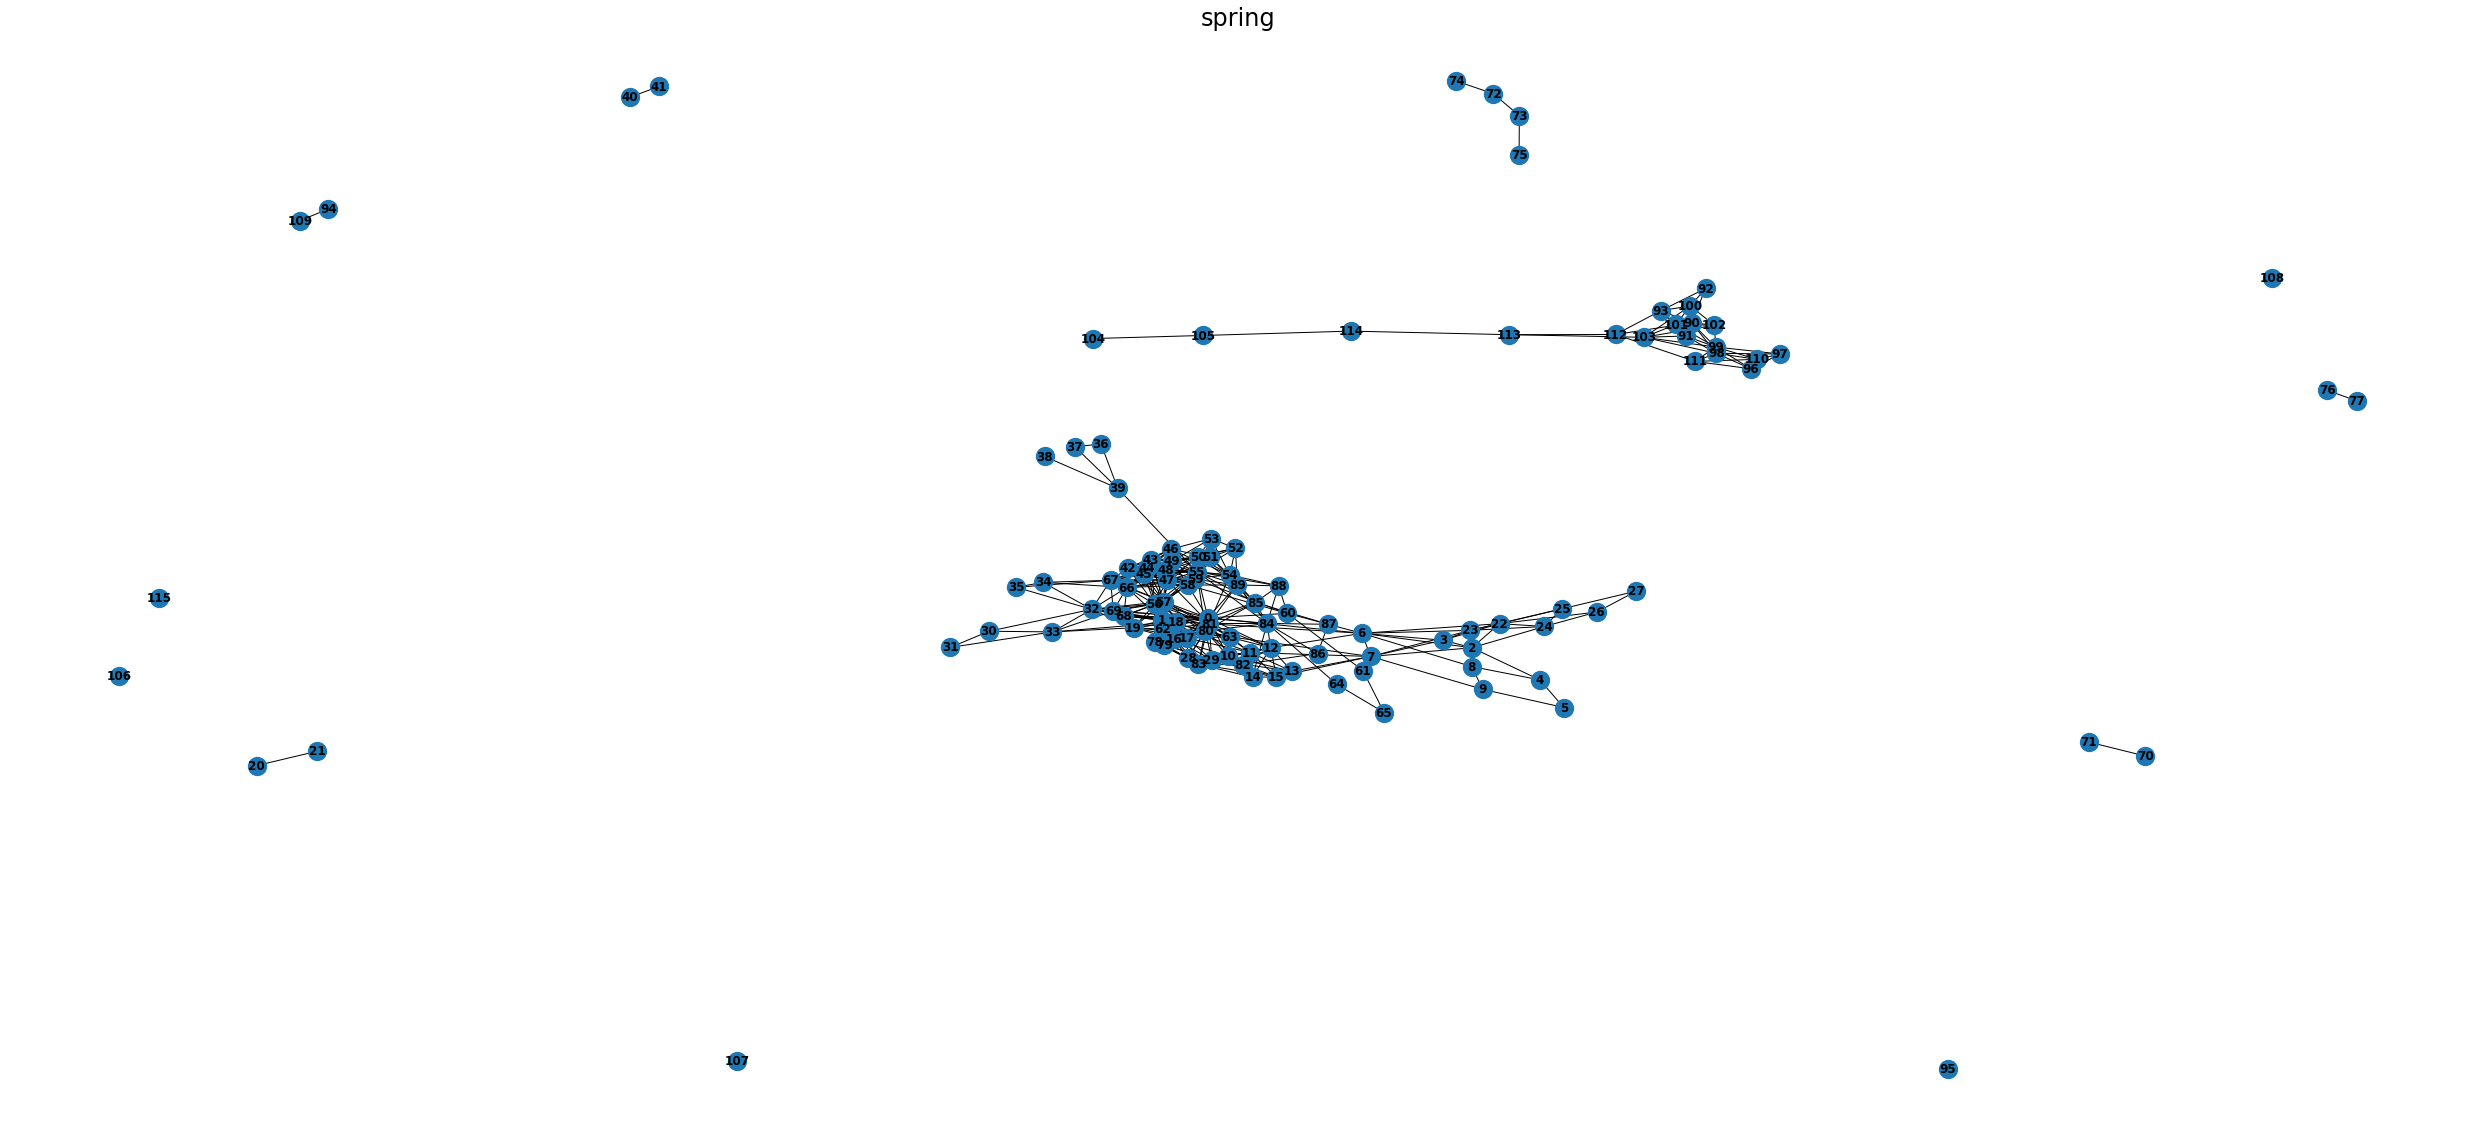

In [101]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_N1_25 = nx.from_numpy_matrix(MAT_N1_25)
nx.draw(G_N1_25, with_labels=True, font_weight='bold')
plt.title('spring')

#plt.subplot(132)
#layout=nx.fruchterman_reingold_layout(G_N1_25)
#nx.draw(G_N1_25,layout, with_labels=True, font_weight='bold')
#plt.title('fruchterman reingold')

#plt.subplot(133)
#layout=nx.circular_layout(G_N1_25)
#nx.draw(G_N1_25,layout, with_labels=True, font_weight='bold')
#plt.title('circular');

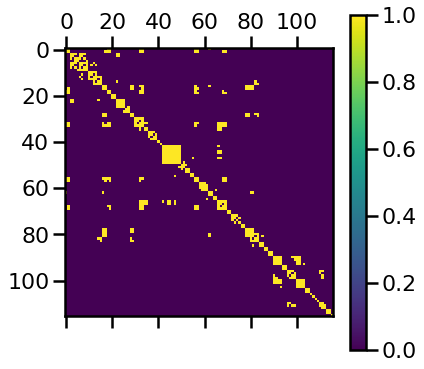

In [102]:
# calcula  el umbral por el porcentaje del parametro
MAT_N2_25=calcula_umbral_porcentaje (N2_prom, 0.25)
plt.matshow(MAT_N2_25)
plt.colorbar()

Text(0.5, 1.0, 'spring')

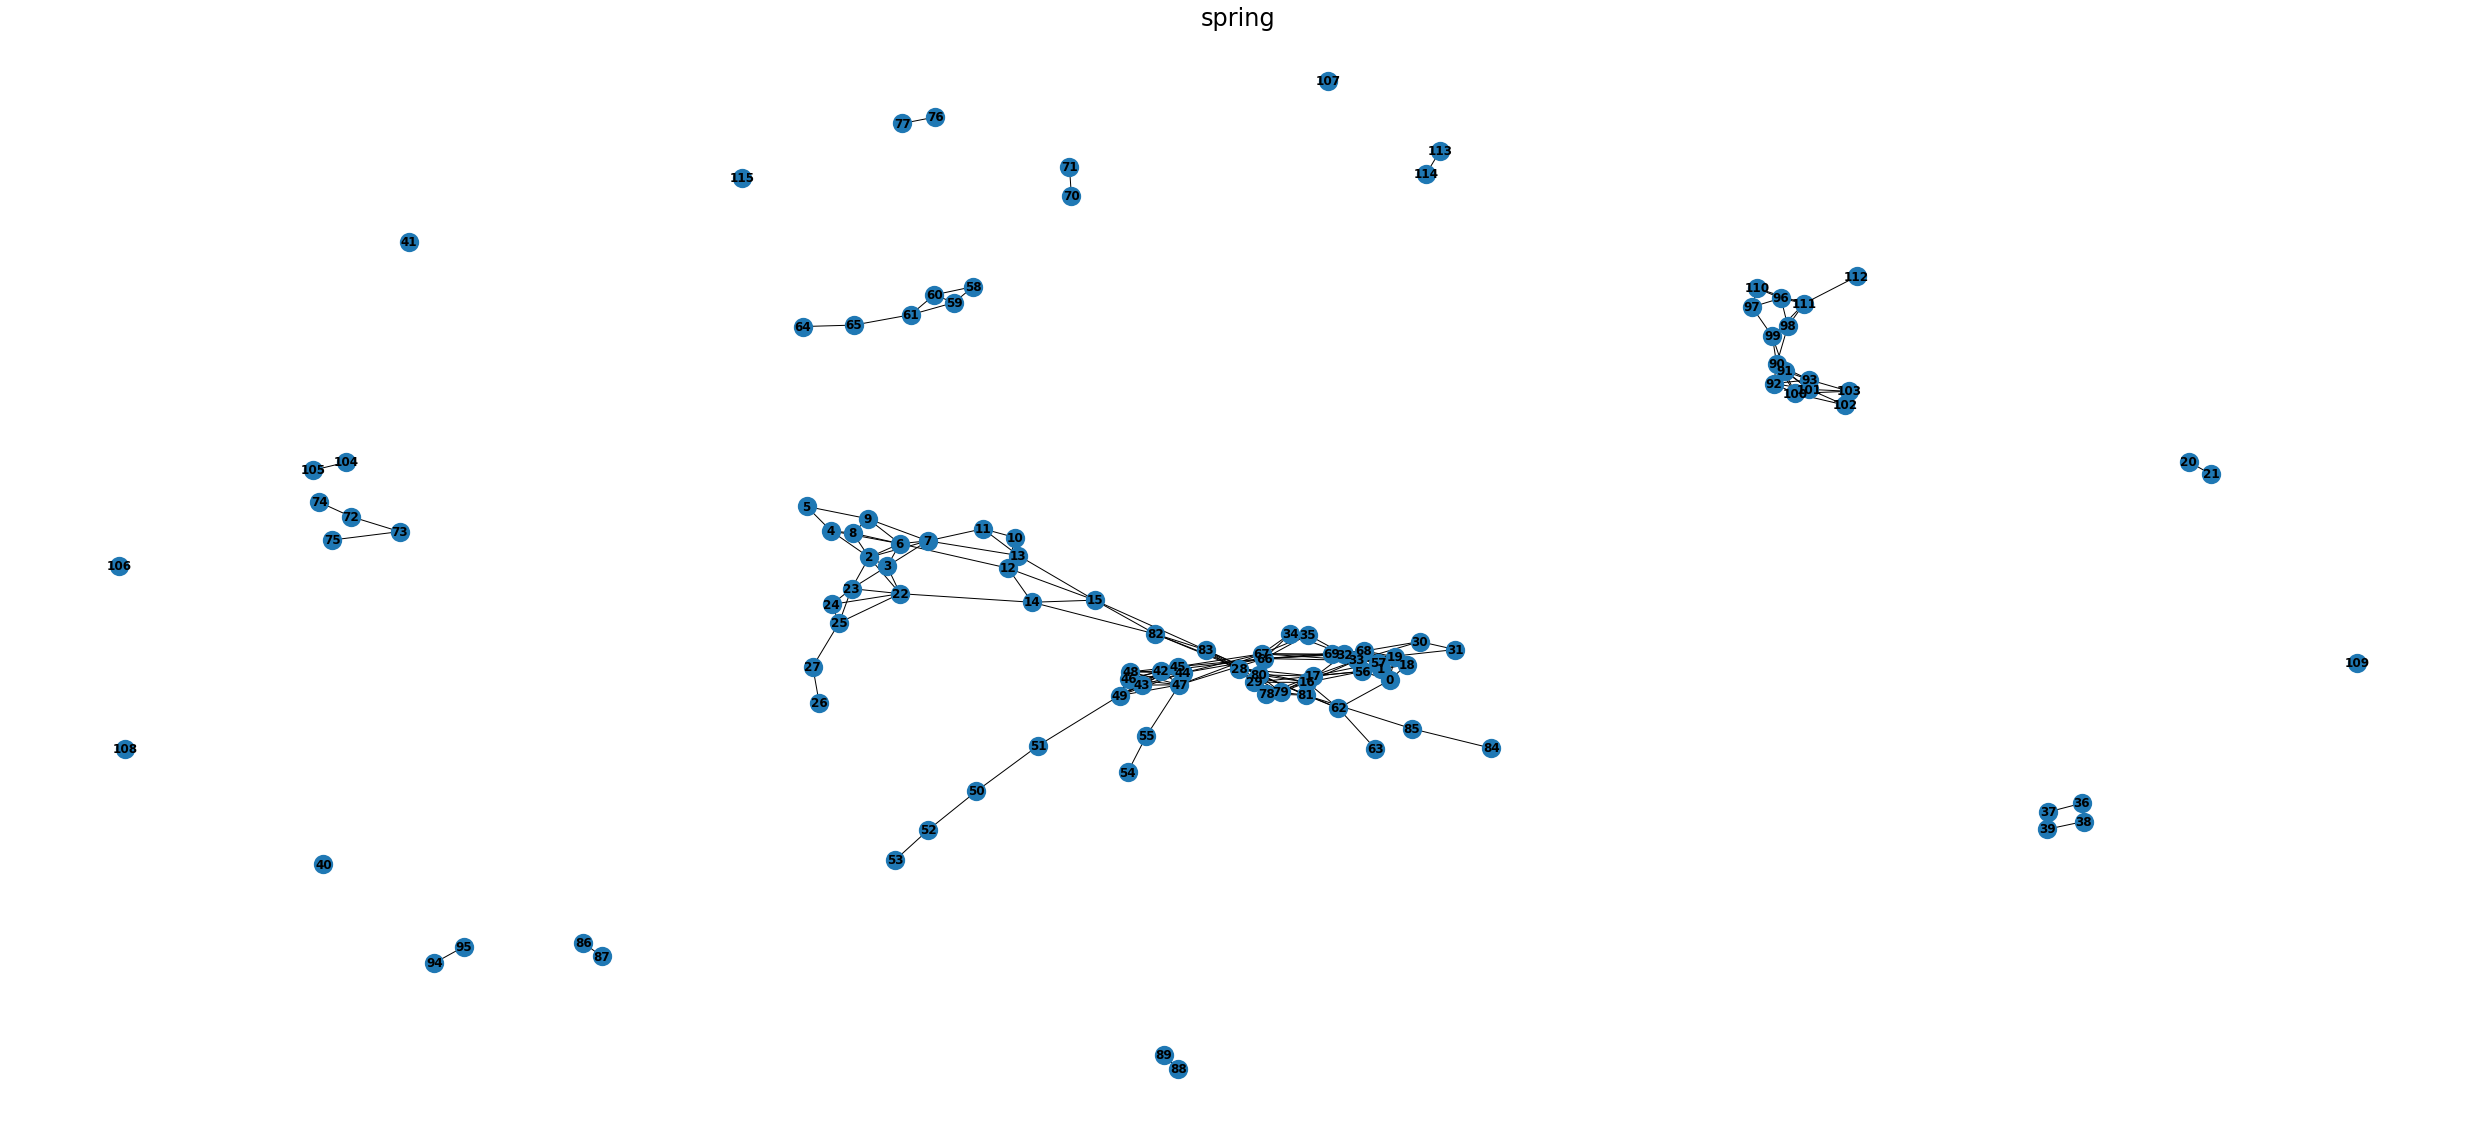

In [104]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_N2_25 = nx.from_numpy_matrix(MAT_N2_25)
nx.draw(G_N2_25, with_labels=True, font_weight='bold')
plt.title('spring')


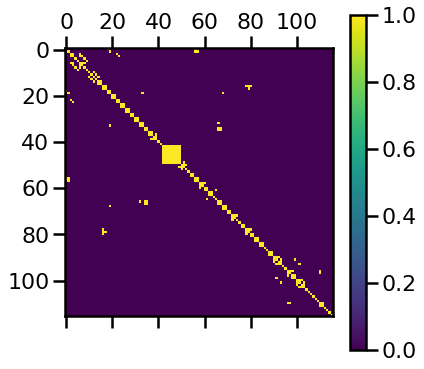

In [105]:
MAT_N3_25=calcula_umbral_porcentaje (N3_prom, 0.25)
plt.matshow(MAT_N3_25)
plt.colorbar()

Text(0.5, 1.0, 'spring')

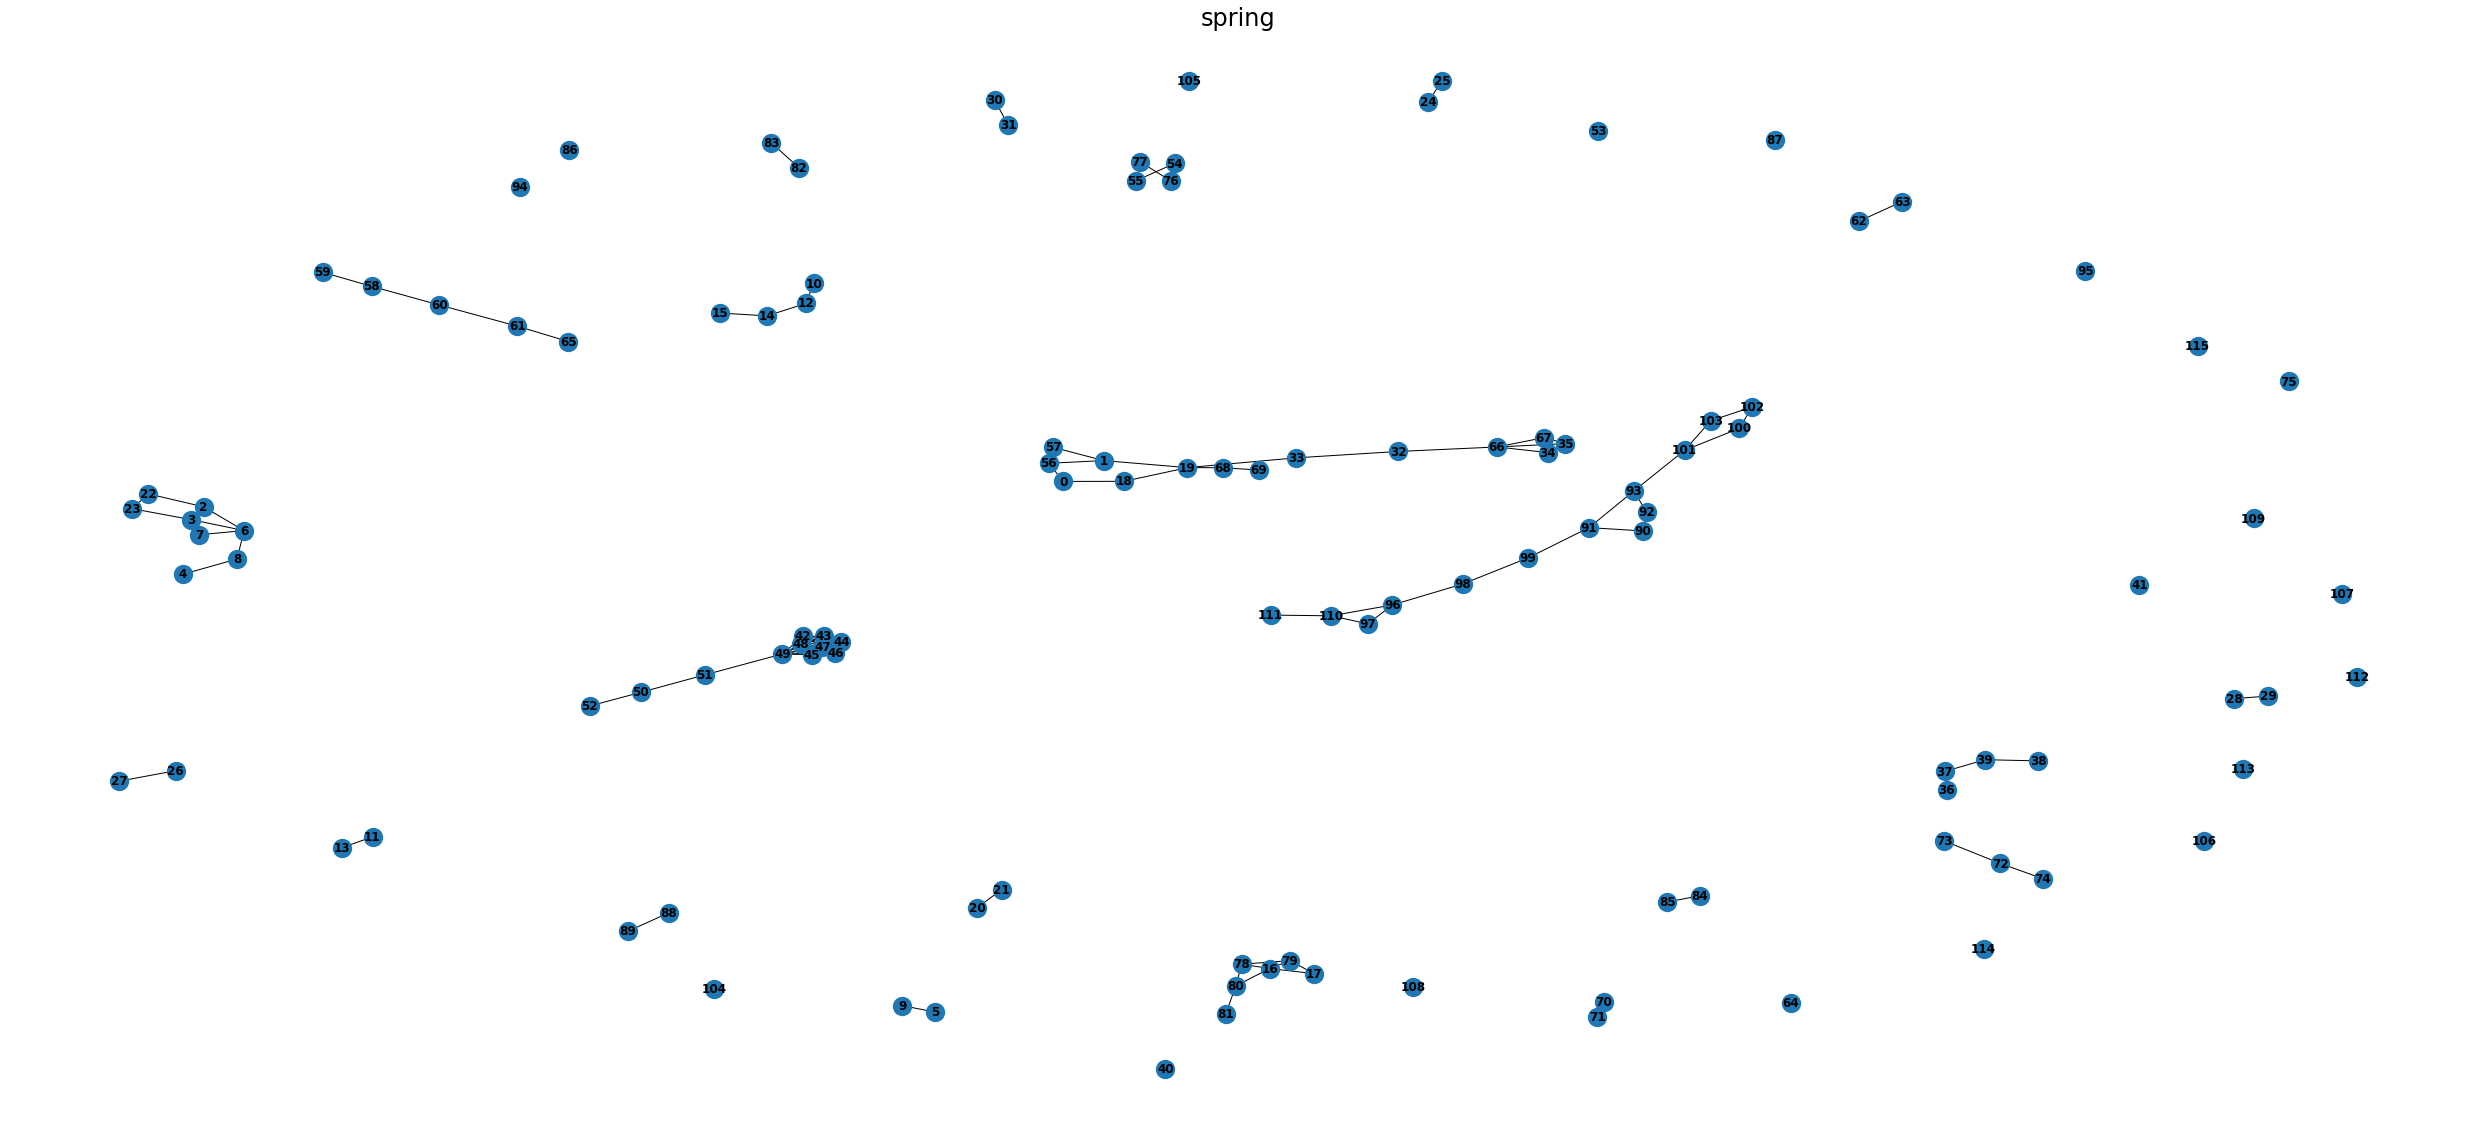

In [106]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_N3_25 = nx.from_numpy_matrix(MAT_N3_25)
nx.draw(G_N3_25, with_labels=True, font_weight='bold')
plt.title('spring')


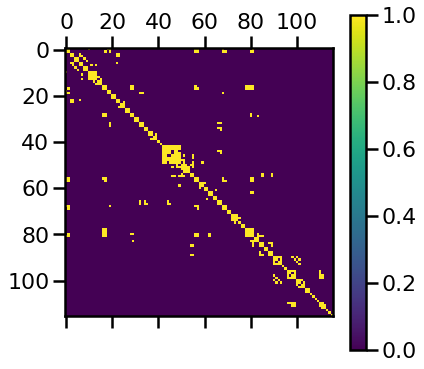

In [107]:
MAT_W_25=calcula_umbral_porcentaje (W_prom, 0.25)
plt.matshow(MAT_W_25)
plt.colorbar()

Text(0.5, 1.0, 'spring')

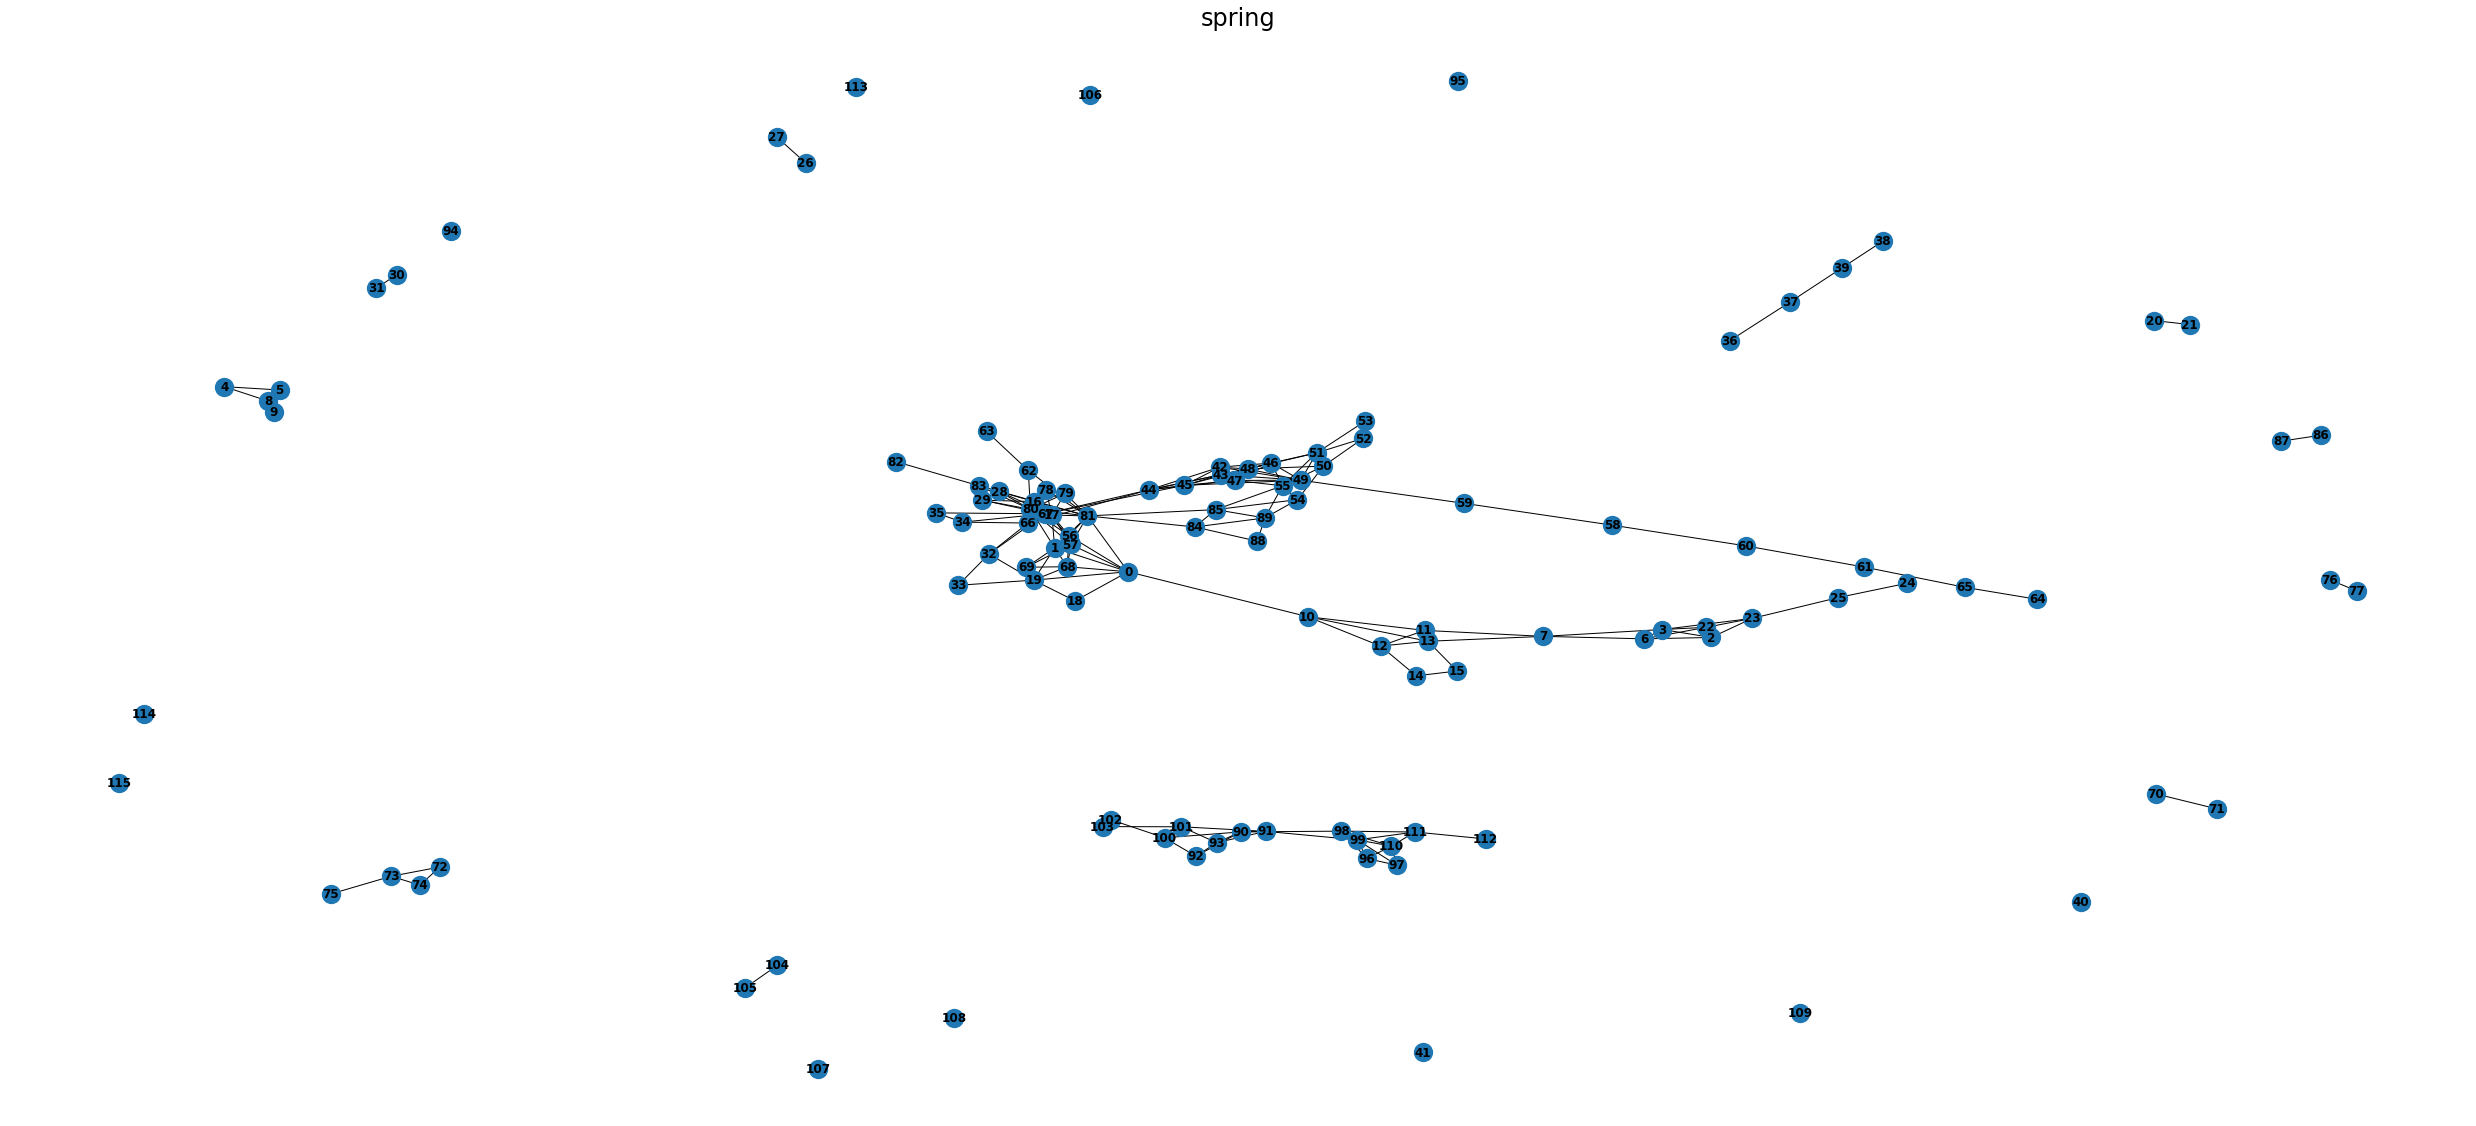

In [108]:
plt.figure(figsize=(150,20))
plt.subplot(131)
G_W_25 = nx.from_numpy_matrix(MAT_W_25)
nx.draw(G_W_25, with_labels=True, font_weight='bold')
plt.title('spring')

In [139]:
# coeficiente de clustering total
print(nx.average_clustering(G_N1_25))
print(nx.average_clustering(G_N2_25))
print(nx.average_clustering(G_N3_25))
nx.average_clustering(G_W_25)

0.4453955547765164
0.3803662812283501
0.17025862068965514


0.35620926008857046

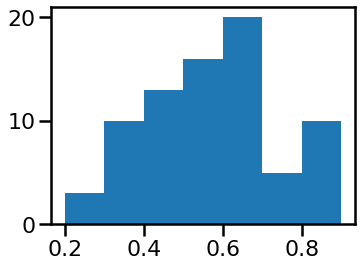

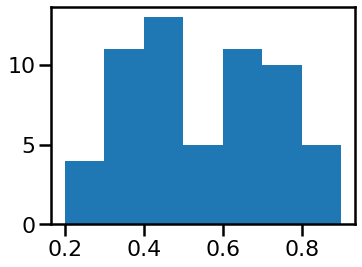

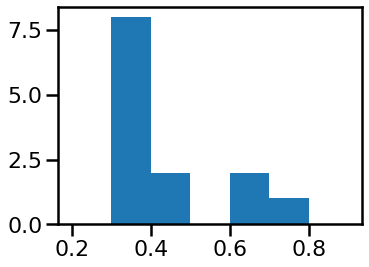

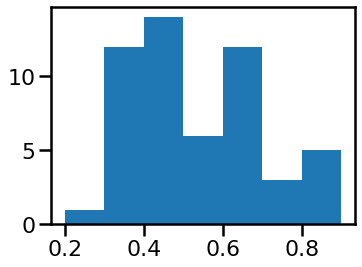

In [140]:
# histograma de coeficientes de cluster (de cada nodo)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_N1_25).values(),bins=np.arange(0.2,1,0.1));

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_N2_25).values(),bins=np.arange(0.2,1,0.1));

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_N3_25).values(),bins=np.arange(0.2,1,0.1));

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(nx.clustering(G_W_25).values(),bins=np.arange(0.2,1,0.1));

In [145]:
#grados por nodo
df = pd.DataFrame(G_N1_25.degree,columns=['Node','Degree']).set_index('Node')
print(df.T)

# grados totales
df.sort_values('Degree',ascending=False).T

Node    0    1    2    3    4    5    6    ...  109  110  111  112  113  114  115
Degree   23   21   10    7    5    4   12  ...    3    7    7    6    5    4    2

[1 rows x 116 columns]


Node,57,56,81,55,0,1,80,49,48,47,66,17,16,67,45,44,32,58,84,19,54,51,62,50,78,89,42,46,12,11,18,59,69,83,43,79,28,29,6,7,...,86,87,113,92,4,35,30,26,9,61,31,36,37,105,27,64,65,5,72,73,114,21,109,104,20,77,38,76,40,41,94,70,71,74,75,106,107,108,95,115
Degree,30,26,25,24,23,21,21,19,19,19,18,18,17,16,16,16,16,16,15,15,15,15,14,14,14,14,14,13,13,13,13,13,13,13,13,13,13,13,12,12,...,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2


In [146]:
#grados por nodo
df = pd.DataFrame(G_N2_25.degree,columns=['Node','Degree']).set_index('Node')
print(df.T)

# grados totales
df.sort_values('Degree',ascending=False).T

Node    0    1    2    3    4    5    6    ...  109  110  111  112  113  114  115
Degree   10   12    9    7    6    4    9  ...    2    5    7    3    3    3    2

[1 rows x 116 columns]


Node,32,33,66,56,17,16,1,47,68,19,45,44,67,69,42,49,81,57,80,0,18,79,46,78,43,90,2,100,28,101,6,48,29,93,22,7,91,83,111,15,...,51,5,65,37,36,55,31,27,71,26,95,104,105,20,112,113,114,21,94,70,53,74,75,76,77,64,54,63,84,86,87,88,89,40,106,107,108,109,41,115
Degree,17,16,13,13,13,13,12,12,11,11,11,11,11,11,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,7,7,...,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2


In [147]:
#grados por nodo
df = pd.DataFrame(G_N3_25.degree,columns=['Node','Degree']).set_index('Node')
print(df.T)

# grados totales
df.sort_values('Degree',ascending=False).T



Node    0    1    2    3    4    5    6    ...  109  110  111  112  113  114  115
Degree    4    5    5    6    3    3    6  ...    2    5    3    2    2    2    2

[1 rows x 116 columns]


Node,49,42,44,43,45,46,47,48,66,16,19,6,3,34,56,1,80,67,78,35,79,2,110,93,101,96,91,90,98,103,102,100,99,51,50,97,57,60,61,92,...,27,55,30,54,29,59,28,52,62,63,36,38,65,26,25,24,69,70,71,73,31,114,112,107,108,105,109,113,106,41,104,95,94,87,86,40,75,64,53,115
Degree,10,9,9,9,9,9,9,9,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [148]:
#grados por nodo
df = pd.DataFrame(G_W_25.degree,columns=['Node','Degree']).set_index('Node')
df.T

# grados totales
df.sort_values('Degree',ascending=False).T

Node,81,80,17,49,48,1,56,55,57,47,16,0,51,46,45,44,43,42,68,67,99,19,98,29,79,13,85,50,90,89,110,3,78,7,101,54,10,11,6,12,...,9,53,59,60,5,4,61,104,64,105,20,21,24,112,26,27,30,38,63,70,71,75,31,77,76,82,36,86,87,40,41,106,107,108,109,95,94,113,114,115
Degree,15,14,12,11,11,11,10,10,10,10,10,10,9,9,9,9,9,9,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,...,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2


array([[1.        , 0.68092169],
       [0.68092169, 1.        ]])

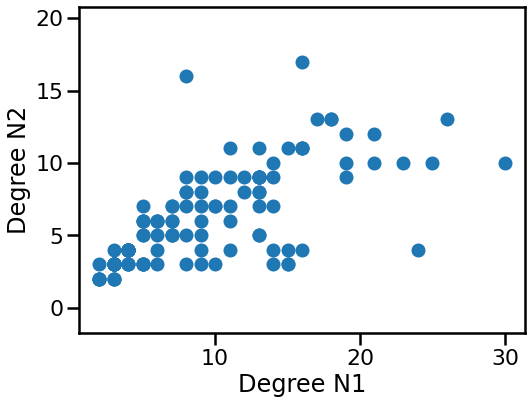

In [126]:
#comp comparar los grados de los grafos de estadios de sueño
degree_N1 = [d for n, d in G_N1_25.degree]
degree_N2 = [d for n, d in G_N2_25.degree]

plt.scatter(degree_N1,degree_N2);
plt.axis('equal')
plt.xlabel('Degree N1')
plt.ylabel('Degree N2');

#coef de correlacion entre dos grafos.
np.corrcoef(degree_N1,degree_N2)

**Medias de centralidad**

Es posible calcular las medias de centralidad:

Grado

Intermediación (betweenness)

Cercanía (Closeness)

Centralidad de autovectores (Eigenvector centrality)

En las salidas siguientes se muestran llamadas a las distintas funciones de centralidad, y se muestran los 10 individuos con valores mayores para cada medida y red.

Text(0.5, 1.0, 'Centralidad de Grado')

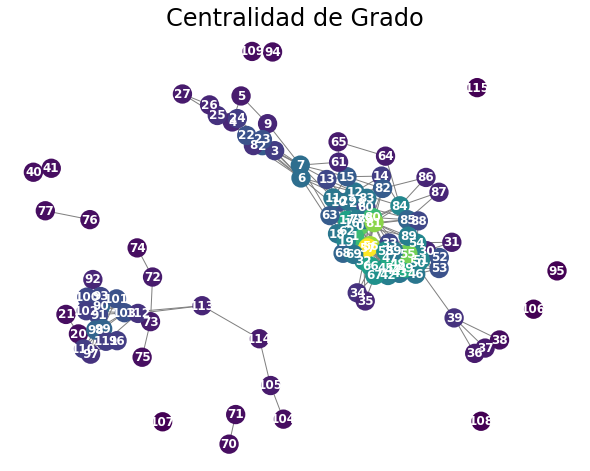

In [134]:
#medidas de centralidad
pos = nx.spring_layout(G_N1_25,k=0.2)

centrality = nx.degree_centrality(G_N1_25)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_25,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Grado')


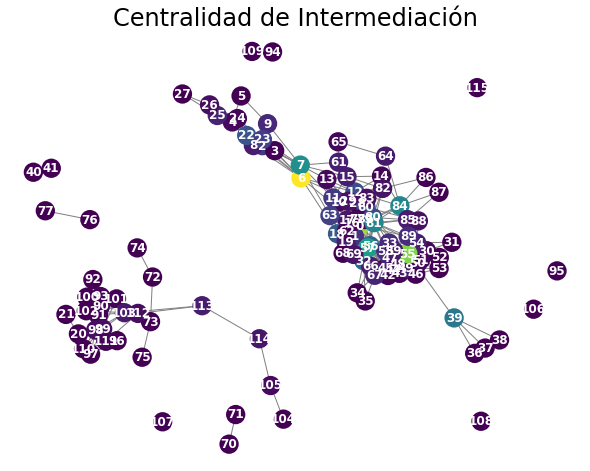

In [135]:
# centralidad de intermediacion
centrality = nx.betweenness_centrality(G_N1_25)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_25,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Intermediación');

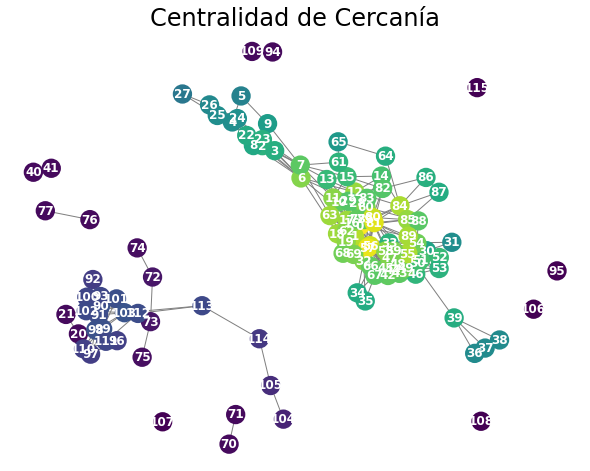

In [136]:
# centralidad de cercania
centrality = nx.closeness_centrality(G_N1_25)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_25,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Cercanía');

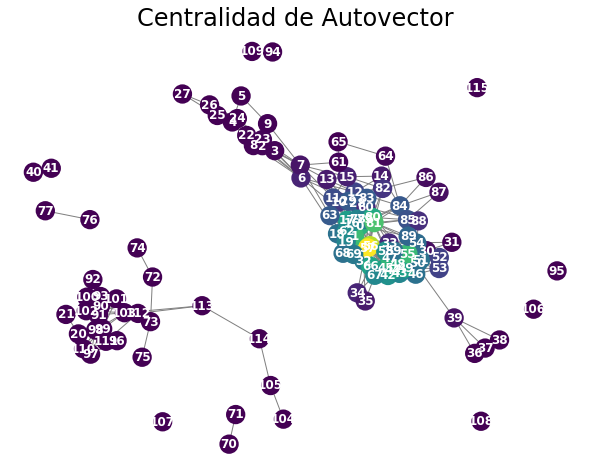

In [137]:
# centralidad de autovector
centrality = nx.eigenvector_centrality(G_N1_25)
values = [v for n,v in centrality.items()]
nx.draw(G_N1_25,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')
plt.title('Centralidad de Autovector');

Tarea 2
Comunidades

Louvian
El módulo community usa el método de louvian. Para la red Observada

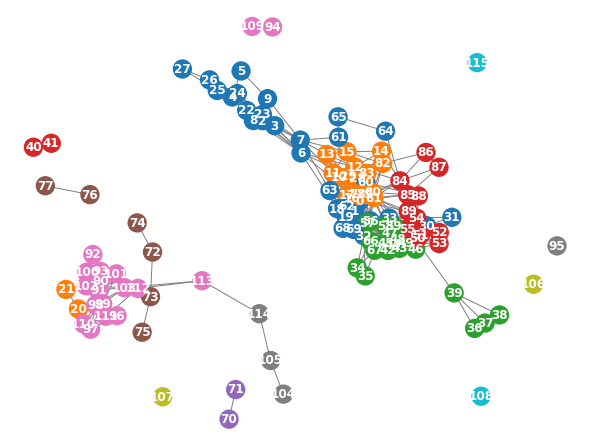

In [152]:
# falta coeficiente de modularidad
modulos = community.best_partition(G_N1_25)
values_obs = [v for n,v in modulos.items()]
nx.draw(G_N1_25,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

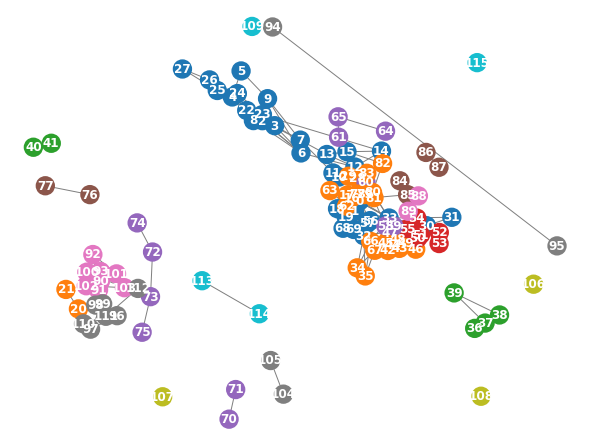

In [156]:
modulos = community.best_partition(G_N2_25)
values_obs = [v for n,v in modulos.items()]
nx.draw(G_N2_25,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

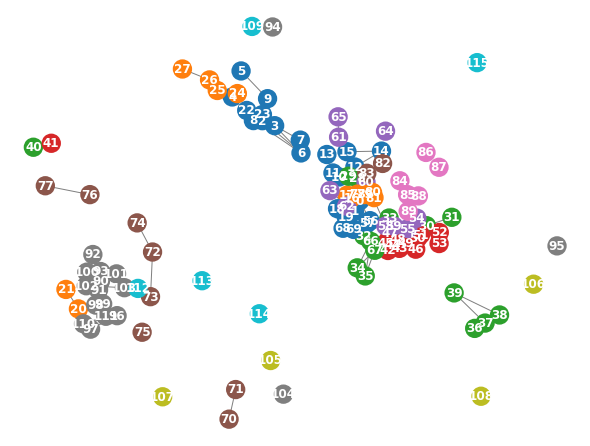

In [157]:
modulos = community.best_partition(G_N3_25)
values_obs = [v for n,v in modulos.items()]
nx.draw(G_N3_25,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

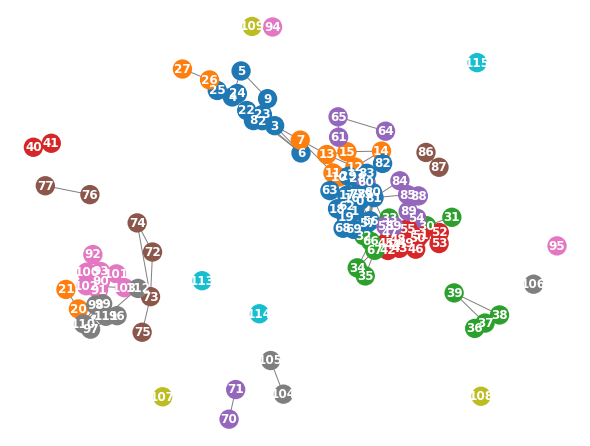

In [158]:
modulos = community.best_partition(G_W_25)
values_obs = [v for n,v in modulos.items()]
nx.draw(G_W_25,pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

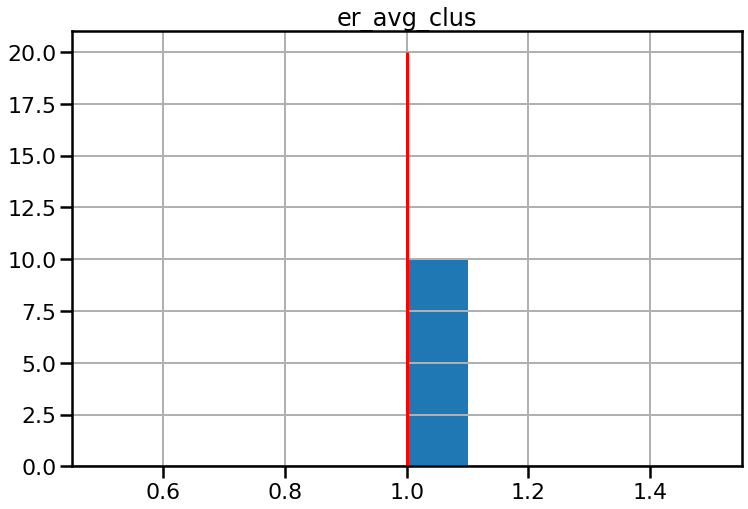

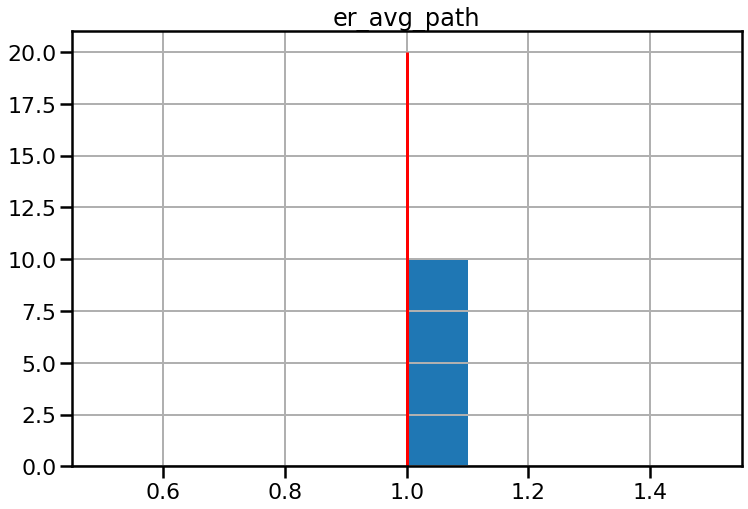

In [166]:
# red random que preserve la distribucion de grados
repetitions = 1000
data = []
G_obs_N1 = nx.from_numpy_matrix(N1_prom)
for i in range(repetitions):
    d = {}
    G = nx.gnm_random_graph(G_obs_N1.number_of_nodes(),G_obs_N1.number_of_edges())    
    d['er_avg_clus'] = nx.average_clustering(G)
    d['er_avg_path'] = nx.average_shortest_path_length(G)

    data.append(d)

df = pd.DataFrame(data)
axs = df.filter(regex='avg_clus').hist(figsize=(12,8),density=True)
for ax in axs.flatten():
    ax.vlines(nx.average_clustering(G_obs_N1),0,20,lw=3,color='r')

axs = df.filter(regex='avg_path').hist(figsize=(12,8),density=True)
for ax in axs.flatten():
    ax.vlines(nx.average_shortest_path_length(G_obs_N1),0,20,lw=3,color='r')